In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [28]:
df = pd.read_csv('..\Initial_data\K5T4\K5T4_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9232\2155315445.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T4\K5T4_cor.csv', ";")


K5PC5CH.OP  K5PCV5I.PV   K5T4.PV  K5P21.PV  K5T18_2.PV   K5T7.PV  \
0        31.02161    94.96500  114.5010 -279.1992    75.00625  49.41198   
1        31.07828    94.97078  114.4773 -279.1100    74.89687  49.44865   
2        30.82781    94.96719  114.5524 -277.3275    75.06937  49.45531   
3        30.97302    94.96458  114.2618 -278.3367    75.36188  49.49219   
4        30.98516    94.96724  114.1529 -280.1042    75.17396  49.52760   
...           ...         ...       ...       ...         ...       ...   
24475    55.63448    97.66031  138.2167 -535.8150    91.42375  52.28614   
24476    55.54047    97.65448  138.1605 -530.9592    91.44312  52.37698   
24477    55.51609    97.65677  138.2320 -534.3467    91.44583  52.37437   
24478    55.33755    97.66161  138.1123 -530.2617    91.46604  52.34958   
24479    55.48906    97.65781  138.1857 -533.8625    91.44625  52.30479   

       K5P19_2.PV  K5P19_1.PV  K5PC6CH.OP  K5HCV63I.PV  ...  K5T12.PV  \
0       -274.7765   -325.1356    43.14094     99.19063  ...  152.0324   
1       -274.3475   -323.1846    43.14161     99.07547  ...  151.9718   
2       -275.6013   -322.9250    43.13417     99.15958  ...  151.9571   
3       -275.1054   -323.2361    43.16640     99.12093  ...  151.9323   
4       -273.4646   -319.4931    43.16813     99.06464  ...  151.9283   
...           ...         ...         ...          ...  ...       ...   
24475   -207.7773   -271.8371    66.48933     99.82797  ...  176.0842   
24476   -213.1100   -272.8221    66.47859     99.78938  ...  176.0089   
24477   -209.8138   -272.5367    66.46609     99.82796  ...  176.0350   
24478   -213.9127   -277.2914    66.43984     99.81010  ...  176.0854   
24479   -211.8594   -273.4571    66.49412     99.83995  ...  176.1285   

       K5P13.PV  K5HCV60I.PV  K5P16_1.PV  K5GKAL.PV  K5HCV61I.PV  K5P16_2.PV  \
0      3.983025     97.38812    0.532047   15.29541     97.78464    0.604910   
1      3.981728     97.37245    0.527215   15.38140     97.80542    0.609322   
2      3.980113     97.40734    0.533984   15.35248     97.83432    0.608432   
3      3.979872     97.41817    0.531675   15.33855     97.83901    0.609033   
4      3.978566     97.36542    0.548240   15.33628     97.78313    0.604587   
...         ...          ...         ...        ...          ...         ...   
24475  4.067581     97.51240    1.217788   21.52003     97.80813    1.353510   
24476  4.063694     97.50407    1.245809   21.45930     97.82995    1.344710   
24477  4.065034     97.51958    1.232027   21.45812     97.84521    1.346949   
24478  4.068994     97.50943    1.244871   21.49810     97.79406    1.348514   
24479  4.069281     97.50495    1.235343   21.49442     97.81589    1.353297   

       K5FCV4_1I.PV  K5Q2_1.PV  K5P4_1.PV  
0          5.450104   368.9479   10.97927  
1          5.453073   370.0990   11.02042  
2          5.451042   368.3698   10.91922  
3          5.426406   372.7656   10.99307  
4          5.448646   369.5052   10.91474  
...             ...        ...        ...  
24475     30.036820   632.7239   21.92401  
24476     30.069580   637.1042   21.94292  
24477     30.042500   636.3177   21.99427  
24478     30.053280   633.8906   21.88974  
24479     30.042340   636.1614   21.97292  

[24480 rows x 51 columns]

<AxesSubplot:>

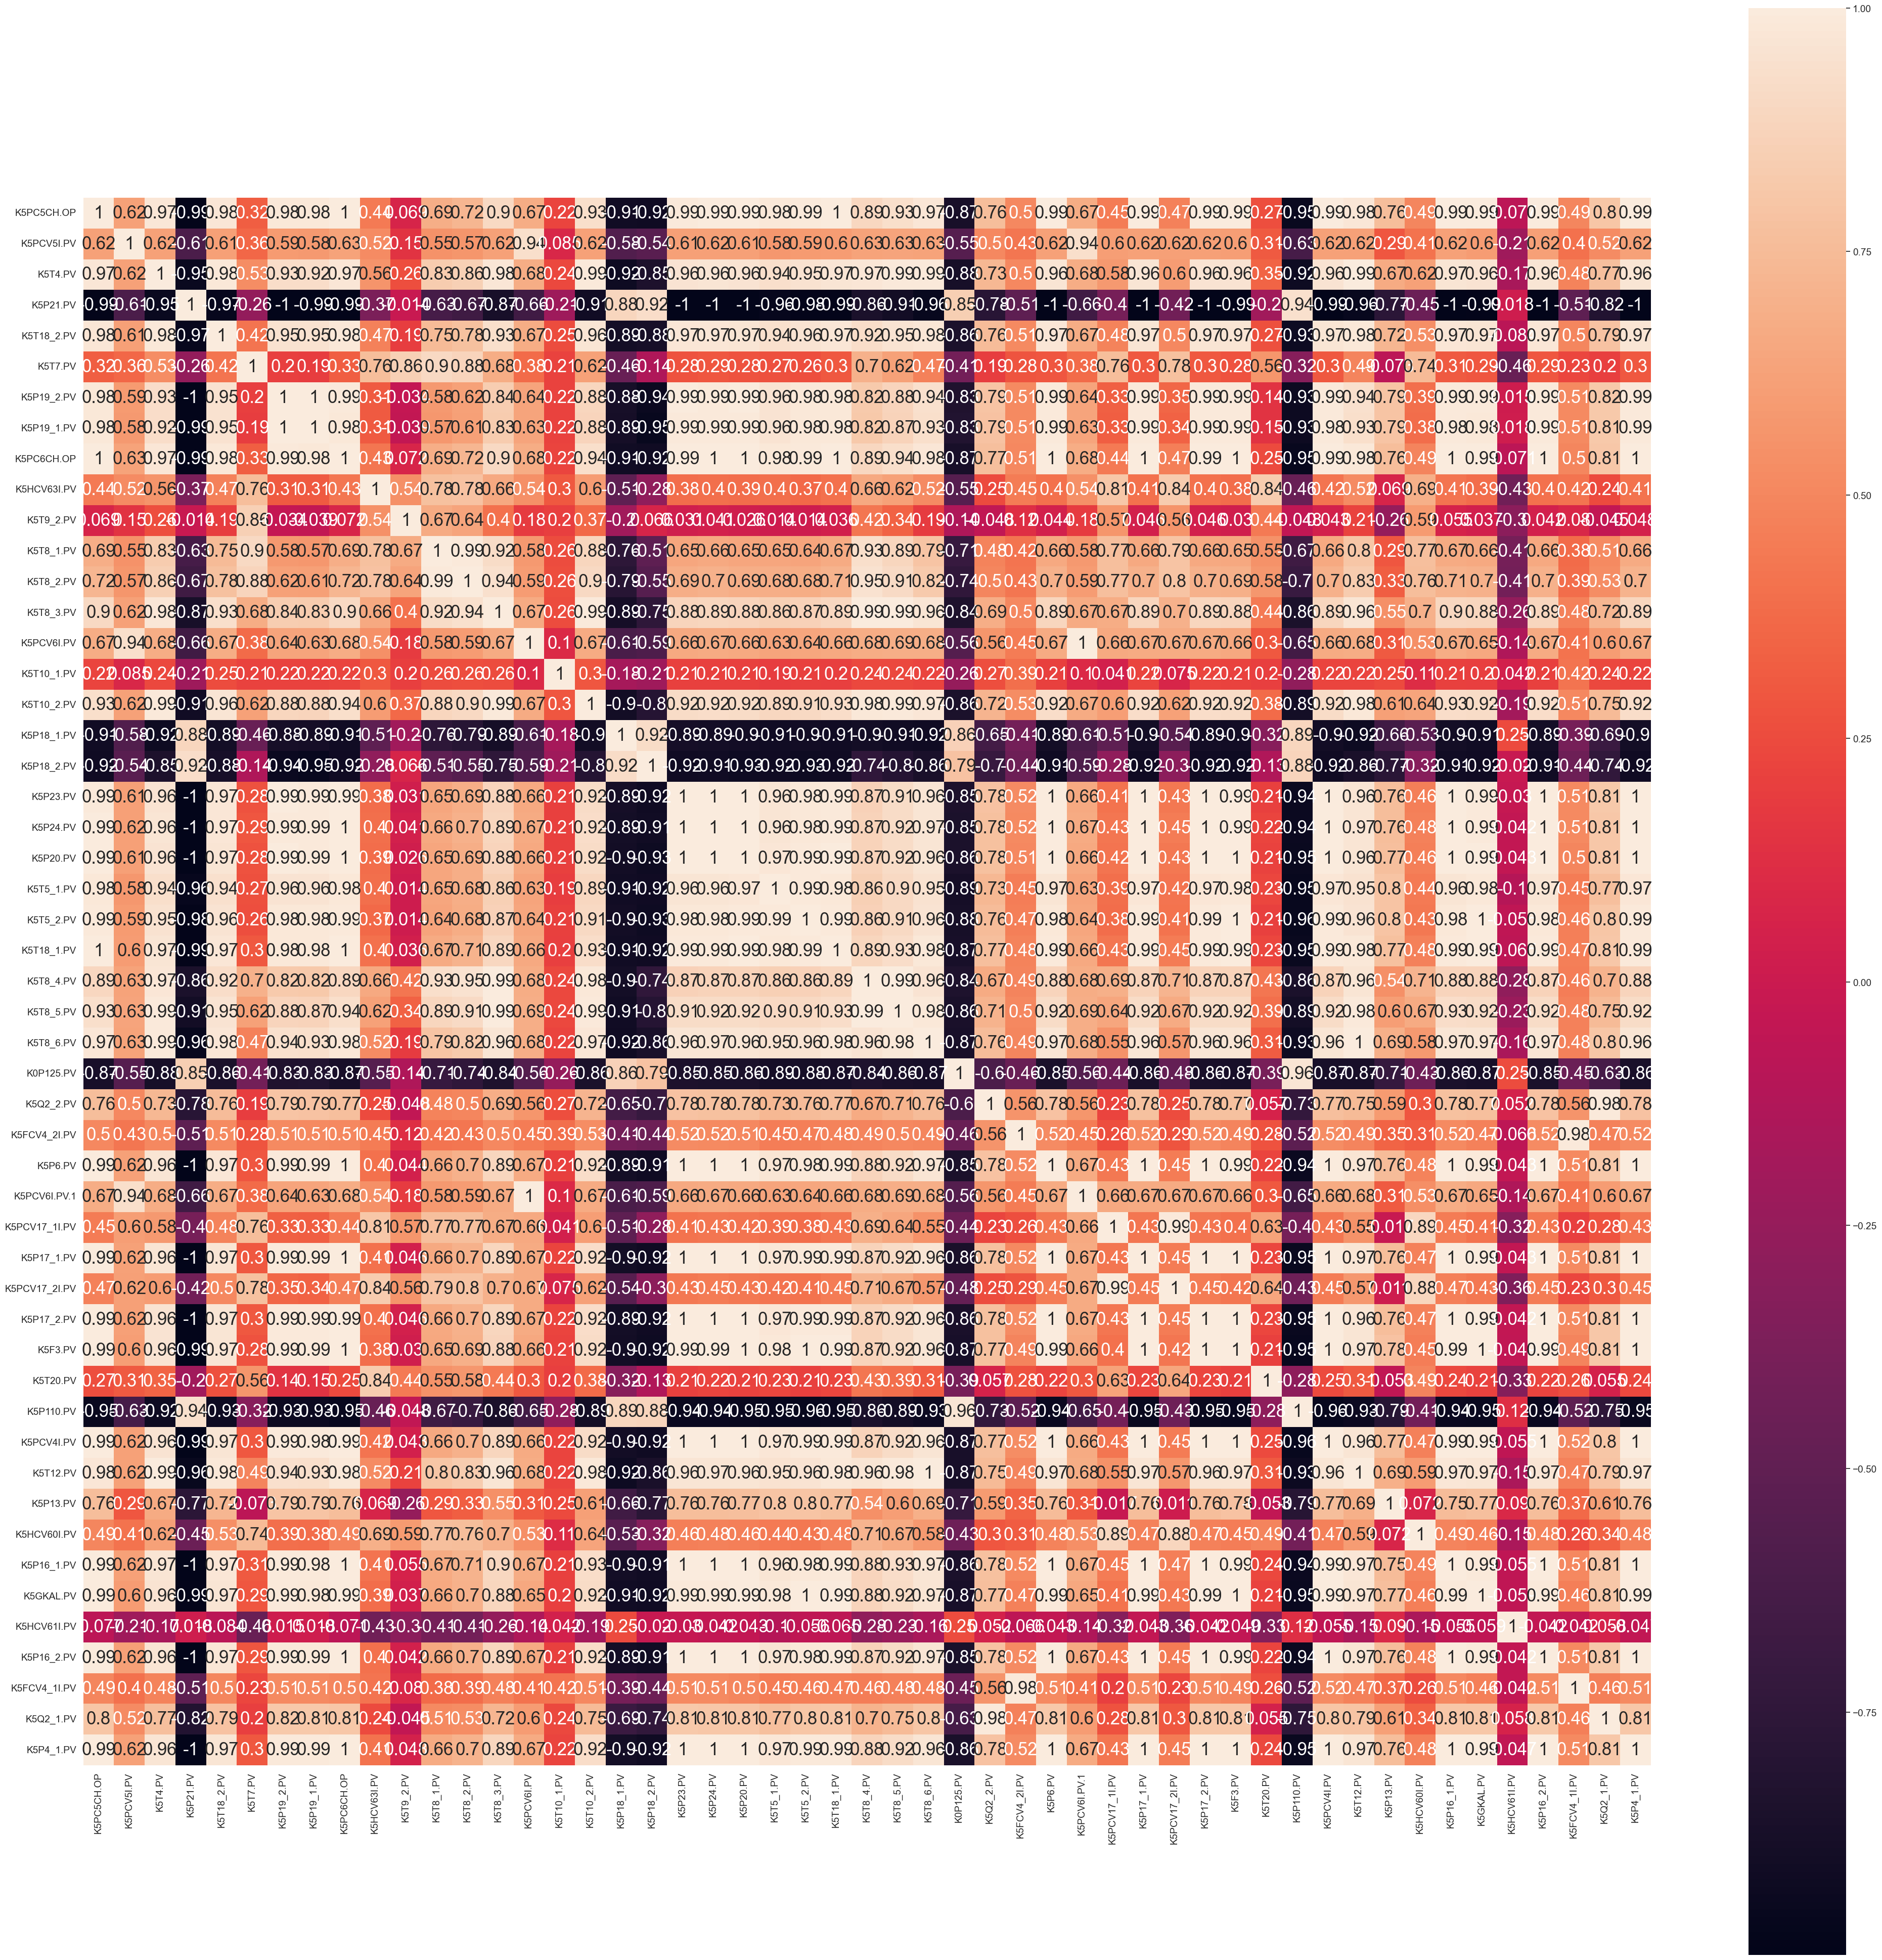

In [29]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [27]:
df = pd.read_csv('..\Initial_data\K5T4\K5T4.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_9232\313295036.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T4\K5T4.csv', ";")


K5PC5CH.OP  K5PCV5I.PV   K5T4.PV  K5T18_2.PV  K5PC6CH.OP  K5T9_1.PV  \
0      28.43256    96.80196  107.4449    76.77946    41.48160   23.78062   
1      37.02330    96.78888  116.0183    81.91438    49.20881   22.55076   
2      40.27494    96.86331  120.4990    84.44536    52.11905   21.99088   
3      33.39332    96.85043  111.9130    79.10992    45.67082   21.82398   
4      31.39035    96.77234  109.0870    78.44747    44.23922   19.94676   
..          ...         ...       ...         ...         ...        ...   
124    33.25313    96.28430  117.2377    80.47744    45.77393   25.59253   
125    32.90705    96.27695  117.2050    80.10125    45.42057   25.88061   
126    31.83300    96.27595  114.7550    76.20879    44.49977   24.04517   
127    30.21828    96.23937  112.3144    71.99249    43.29536   22.76711   
128    30.02334    96.26389  111.5524    73.74758    42.98117   23.12098   

     K5T9_2.PV  K5PCV6I.PV  K5T10_1.PV  K5T10_2.PV  
0     24.07831    95.68557    59.77333    90.33453  
1     22.97996    95.67174    71.05275    94.62981  
2     21.95745    95.70911    72.43599    97.20560  
3     21.60457    95.63900    68.05637    91.99626  
4     19.60295    95.39429    64.59758    90.22770  
..         ...         ...         ...         ...  
124   24.58385    95.26511    92.96518    94.62846  
125   24.84278    95.38406    93.61079    94.61106  
126   23.64379    95.35741    91.39860    92.59914  
127   23.21000    95.12940    84.64066    91.07623  
128   23.60950    95.27136    72.31094    90.75005  

[129 rows x 10 columns]

In [7]:
df=df.dropna()
df=df.round(3)
df

K5PC5CH.OP  K5PCV5I.PV  K5T4.PV  K5T18_2.PV  K5PC6CH.OP  K5T9_2.PV  \
0        28.433      96.802  107.445      76.779      41.482     24.078   
1        37.023      96.789  116.018      81.914      49.209     22.980   
2        40.275      96.863  120.499      84.445      52.119     21.957   
3        33.393      96.850  111.913      79.110      45.671     21.605   
4        31.390      96.772  109.087      78.447      44.239     19.603   
..          ...         ...      ...         ...         ...        ...   
124      33.253      96.284  117.238      80.477      45.774     24.584   
125      32.907      96.277  117.205      80.101      45.421     24.843   
126      31.833      96.276  114.755      76.209      44.500     23.644   
127      30.218      96.239  112.314      71.992      43.295     23.210   
128      30.023      96.264  111.552      73.748      42.981     23.610   

     K5PCV6I.PV  K5T10_1.PV  K5T10_2.PV  
0        95.686      59.773      90.335  
1        95.672      71.053      94.630  
2        95.709      72.436      97.206  
3        95.639      68.056      91.996  
4        95.394      64.598      90.228  
..          ...         ...         ...  
124      95.265      92.965      94.628  
125      95.384      93.611      94.611  
126      95.357      91.399      92.599  
127      95.129      84.641      91.076  
128      95.271      72.311      90.750  

[129 rows x 9 columns]

In [14]:
y = df.drop(['K5PC5CH.OP', 'K5PCV5I.PV', 'K5T18_2.PV', "K5PC6CH.OP", "K5T9_2.PV", "K5PCV6I.PV", "K5T10_1.PV", "K5T10_2.PV"], axis=1)
x = df.drop(['K5T4.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)


In [17]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(X_train, y_train)
lasso.score(X_train, y_train)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9483884322495313

In [18]:
import pickle
filename = '../model/K5T4.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open("../model/K5T4.sav", 'rb'))

In [20]:
task2 = {'K5PC5CH.OP':[30.023],
        'K5PCV5I.PV':[96.264],
        'K5T18_2.PV':[73.748],
        'K5PC6CH.OP':[42.981],
        'K5T9_2.PV':[23.610],
        'K5PCV6I.PV':[95.271],
        'K5T10_1.PV':[72.311],
        'K5T10_2.PV':[90.750]}
df2 = pd.DataFrame(data=task2)
df2

K5PC5CH.OP  K5PCV5I.PV  K5T18_2.PV  K5PC6CH.OP  K5T9_2.PV  K5PCV6I.PV  \
0      30.023      96.264      73.748      42.981      23.61      95.271   

   K5T10_1.PV  K5T10_2.PV  
0      72.311       90.75

In [21]:
loaded_model.predict(df2)

array([[112.19598948]])